In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.CNN import VanillaConv1d
from genrecog.tools.trainer import CNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
lr = 0.001
model = VanillaConv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

VanillaConv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer): Sequential(
    (0): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out_linear): Linear(in_features=384, out_features=10, bias=True)
)

In [7]:
trainer = CNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 35.53
Training loss 1.8872
Validation accuracy 10.00
Validation loss 5.3330
============================== EPOCH 2 =================================
Training accuracy 53.69
Training loss 1.2677
Validation accuracy 27.75
Validation loss 2.2124
============================== EPOCH 3 =================================
Training accuracy 64.19
Training loss 1.0072
Validation accuracy 43.00
Validation loss 1.6458
============================== EPOCH 4 =================================
Training accuracy 70.72
Training loss 0.8282
Validation accuracy 39.25
Validation loss 1.6473
============================== EPOCH 5 =================================
Training accuracy 76.09
Training loss 0.6927
Validation accuracy 46.00
Validation loss 1.3162
============================== EPOCH 6 =================================
Training accuracy 78.66
Training loss 0.5997
Validation accuracy 51.25
Validation loss 1.446

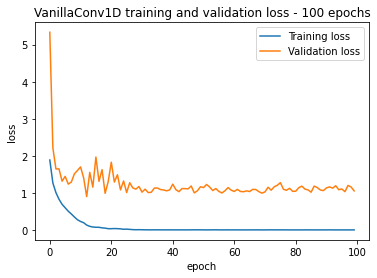

In [8]:
trainer.plot_loss("VanillaConv1D training and validation loss - 100 epochs")

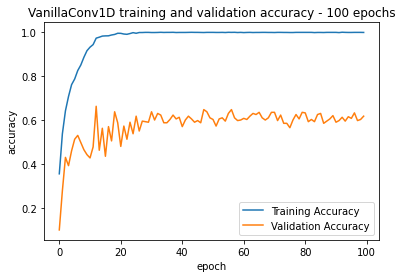

In [9]:
trainer.plot_accuracies("VanillaConv1D training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([6, 6, 6, 6, 3, 5, 6, 9, 6, 4, 3, 2, 6, 7, 3, 5, 2, 1, 6, 4, 4, 4, 8, 3,
         9, 7, 3, 4, 3, 3, 4, 9, 7, 0, 3, 7, 7, 6, 5, 0, 7, 8, 7, 6, 3, 4, 0, 3,
         8, 7, 7, 6, 6, 3, 1, 7, 2, 7, 6, 6, 6, 6, 9, 7, 5, 1, 6, 4, 6, 6, 6, 6,
         1, 7, 9, 3, 6, 7, 5, 3, 6, 7, 7, 9, 6, 3, 7, 6, 4, 4, 6, 6, 9, 7, 6, 7,
         3, 3, 1, 4, 3, 5, 7, 5, 6, 4, 6, 2, 6, 9, 9, 6, 0, 4, 0, 7, 0, 6, 5, 7,
         7, 4, 4, 7, 6, 6, 6, 6, 1, 7, 4, 6, 1, 6, 2, 6, 1, 2, 6, 5, 7, 3, 6, 7,
         8, 7, 5, 7, 6, 4, 6, 2, 6, 6, 5, 3, 5, 1, 2, 3, 6, 6, 5, 6, 4, 6, 8, 9,
         7, 6, 7, 5, 6, 4, 7, 3, 7, 6, 7, 0, 5, 2, 6, 6, 4, 6, 1, 6, 2, 4, 6, 6,
         6, 4, 3, 6, 8, 6, 1, 8, 6, 5, 3, 7, 7, 4, 6, 3, 6, 7, 3, 8, 1, 6, 7, 6,
         7, 5, 9, 6, 6, 6, 3, 3, 5, 3, 6, 0, 1, 9, 6, 7, 8, 6, 3, 4, 9, 6, 6, 9,
         0, 6, 6, 5, 6, 6, 4, 6, 6, 6, 0, 6, 3, 7, 4, 0, 6, 6, 6, 6, 4, 6, 4, 6,
         8, 6, 9, 3, 7, 7, 6, 6, 6, 5, 4, 7, 6, 7, 6, 7, 7, 9, 5, 3, 6, 5, 1, 6,
         5, 2, 7, 3, 3, 3, 6

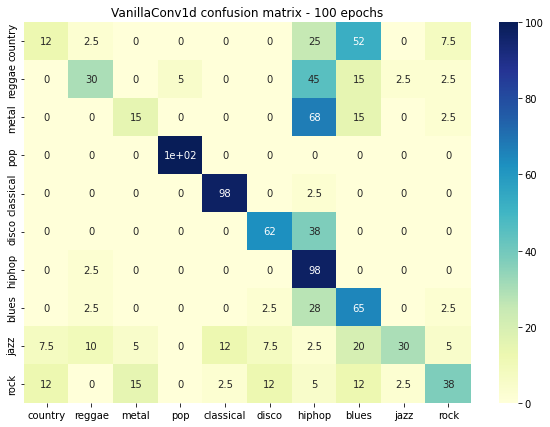

In [11]:
trainer.plot_confusion_matrix(test_dataloader, 'VanillaConv1d confusion matrix - 100 epochs')

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.38      0.12      0.19        40
      reggae       0.63      0.30      0.41        40
       metal       0.43      0.15      0.22        40
         pop       0.95      1.00      0.98        40
   classical       0.87      0.97      0.92        40
       disco       0.74      0.62      0.68        40
      hiphop       0.31      0.97      0.48        40
       blues       0.36      0.65      0.46        40
        jazz       0.86      0.30      0.44        40
        rock       0.65      0.38      0.48        40

    accuracy                           0.55       400
   macro avg       0.62      0.55      0.52       400
weighted avg       0.62      0.55      0.52       400



In [13]:
lr = 0.001
model_2 = VanillaConv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

VanillaConv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer): Sequential(
    (0): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out_linear): Linear(in_features=384, out_features=10, bias=True)
)

In [14]:
trainer_2 = CNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=60)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 36.44
Training loss 1.8128
Validation accuracy 12.00
Validation loss 6.5186
============================== EPOCH 2 =================================
Training accuracy 59.06
Training loss 1.1509
Validation accuracy 22.50
Validation loss 2.7720
============================== EPOCH 3 =================================
Training accuracy 67.94
Training loss 0.8925
Validation accuracy 40.25
Validation loss 1.7540
============================== EPOCH 4 =================================
Training accuracy 75.56
Training loss 0.7147
Validation accuracy 45.75
Validation loss 1.5704
============================== EPOCH 5 =================================
Training accuracy 80.91
Training loss 0.5730
Validation accuracy 35.00
Validation loss 2.2732
============================== EPOCH 6 =================================
Training accuracy 83.94
Training loss 0.4764
Validation accuracy 52.50
Validation loss 1.254

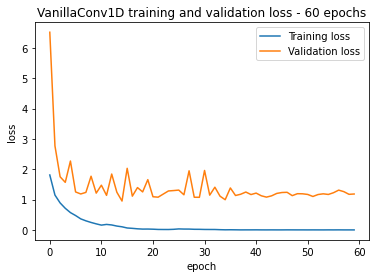

In [15]:
trainer_2.plot_loss("VanillaConv1D training and validation loss - 60 epochs")

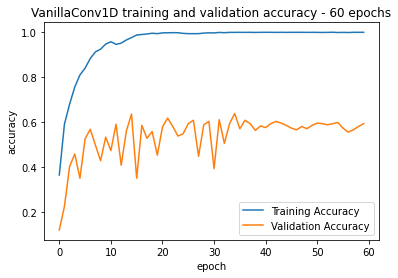

In [16]:
trainer_2.plot_accuracies("VanillaConv1D training and validation accuracy - 60 epochs")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([6, 3, 6, 5, 7, 6, 5, 5, 3, 1, 7, 6, 6, 6, 2, 7, 6, 6, 3, 7, 5, 3, 6, 7,
         4, 6, 7, 2, 1, 3, 6, 5, 8, 6, 6, 3, 1, 4, 3, 2, 6, 2, 7, 2, 6, 4, 7, 4,
         4, 8, 6, 4, 6, 6, 5, 4, 4, 7, 5, 3, 3, 4, 6, 6, 6, 4, 8, 6, 7, 5, 0, 7,
         6, 6, 6, 1, 5, 5, 8, 7, 6, 4, 6, 7, 7, 0, 7, 3, 6, 6, 5, 7, 7, 5, 3, 7,
         6, 5, 6, 3, 6, 7, 4, 4, 7, 6, 4, 7, 6, 6, 3, 6, 7, 3, 6, 7, 3, 3, 9, 7,
         3, 7, 4, 7, 3, 0, 6, 4, 6, 3, 4, 8, 8, 6, 7, 4, 6, 5, 7, 5, 6, 4, 3, 6,
         6, 7, 7, 7, 4, 4, 6, 3, 6, 3, 6, 4, 6, 1, 7, 1, 2, 5, 4, 8, 6, 5, 4, 1,
         1, 6, 2, 6, 4, 5, 7, 7, 1, 9, 6, 3, 5, 6, 8, 7, 6, 6, 6, 6, 7, 6, 6, 7,
         5, 7, 1, 9, 6, 6, 7, 5, 6, 5, 6, 2, 1, 7, 5, 2, 4, 7, 6, 7, 5, 8, 9, 0,
         6, 6, 6, 6, 6, 7, 2, 7, 6, 6, 5, 4, 6, 6, 7, 5, 1, 1, 6, 6, 7, 4, 6, 5,
         1, 2, 6, 7, 3, 5, 6, 7, 3, 4, 2, 1, 1, 6, 6, 3, 4, 7, 6, 6, 1, 7, 7, 5,
         6, 3, 6, 1, 6, 7, 5, 2, 7, 6, 6, 5, 7, 6, 3, 5, 7, 5, 2, 3, 6, 5, 3, 6,
         6, 1, 5, 6, 4, 6, 6

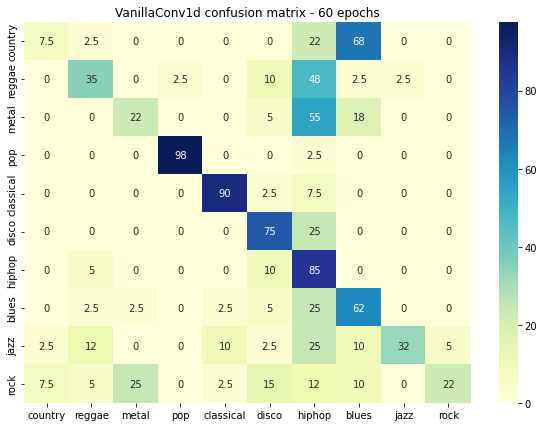

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader, 'VanillaConv1d confusion matrix - 60 epochs')

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.43      0.07      0.13        40
      reggae       0.56      0.35      0.43        40
       metal       0.45      0.23      0.30        40
         pop       0.97      0.97      0.97        40
   classical       0.86      0.90      0.88        40
       disco       0.60      0.75      0.67        40
      hiphop       0.28      0.85      0.42        40
       blues       0.37      0.62      0.46        40
        jazz       0.93      0.33      0.48        40
        rock       0.82      0.23      0.35        40

    accuracy                           0.53       400
   macro avg       0.63      0.53      0.51       400
weighted avg       0.63      0.53      0.51       400

